 # Data Analysis Using [Python](https://www.python.org) - Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

* ### Pandas has two important data strucures **Series** and **DataFrame**

## Series

## **Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)

```python
>>> s = pd.Series(data, index=index)
```

<img src="image/fig_pd_series.png" alt="Pandas Series Example" height="250" width="250" align="left">

In [6]:
person_height_ft = pd.Series([5.5,5.2,5.8,6.1,4.8],name='height',
                index = ['person_a','person_b','person_c','person_d','person_e'],dtype=np.float64)
person_height_ft

person_a    5.5
person_b    5.2
person_c    5.8
person_d    6.1
person_e    4.8
Name: height, dtype: float64

In [7]:
person_height_ft.values

array([5.5, 5.2, 5.8, 6.1, 4.8])

In [8]:
person_height_ft.index

Index(['person_a', 'person_b', 'person_c', 'person_d', 'person_e'], dtype='object')

* ### A Series is like a fixed-size dict in that you can get and set values by index label

In [9]:
person_height_ft['person_c']

5.8

* ### You can also use the index position to get and set the values

In [10]:
person_height_ft[3]

6.1

In [11]:
person_height_ft[0:3]

person_a    5.5
person_b    5.2
person_c    5.8
Name: height, dtype: float64

### Vectorized operations and label alignment with Series

In [12]:
person_height_mtr = (12* 2.54) * person_height_ft/100
person_height_mtr

person_a    1.67640
person_b    1.58496
person_c    1.76784
person_d    1.85928
person_e    1.46304
Name: height, dtype: float64

In [13]:
# please note the index which is not same as height
person_weight_kg = pd.Series([70,55,73,68,66],name='weight',
                index = ['person_b','person_d','person_e','person_c','person_a'],dtype=np.float64)
person_weight_kg

person_b    70.0
person_d    55.0
person_e    73.0
person_c    68.0
person_a    66.0
Name: weight, dtype: float64

In [14]:
#Let's calculate BMI
bmi = person_weight_kg/person_height_mtr**2
bmi

person_a    23.484895
person_b    27.865153
person_c    21.758202
person_d    15.910107
person_e    34.104404
dtype: float64

In [15]:
#BMI of person_c
68/(1.76784*1.76784)

21.75820179358683

## DataFrame

* ### DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. 

<img src="image/fig_pd_data_frame.png" alt="Pandas DataFrame Example" height="400" width="400" align="left">

In [16]:
index = ['person_a','person_b','person_c','person_d','person_e']
df_person = pd.DataFrame({'height':[5.5,5.2,5.8,6.1,4.8],'weight':[66,70,68,55,73],
                   'gender':['male','male','female','male','female']}, index=index)

In [18]:
df_person.describe(include='all')

,height,weight,gender
count,5.000000,5.0000,5
unique,NaN,NaN,2
top,NaN,NaN,male
freq,NaN,NaN,3
mean,5.480000,66.4000,NaN
std,0.506952,6.8775,NaN
min,4.800000,55.0000,NaN
25%,5.200000,66.0000,NaN
50%,5.500000,68.0000,NaN
75%,5.800000,70.0000,NaN


In [19]:
print(df_person.ndim)
print(df_person.shape)
print(df_person.dtypes)
print(df_person.columns)
print(df_person.index)
print(len(df_person))

2
(5, 3)
height    float64
weight      int64
gender     object
dtype: object
Index(['height', 'weight', 'gender'], dtype='object')
Index(['person_a', 'person_b', 'person_c', 'person_d', 'person_e'], dtype='object')
5


In [20]:
df_person.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, person_a to person_e
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  5 non-null      float64
 1   weight  5 non-null      int64  
 2   gender  5 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


In [21]:
df_person.reset_index()

,index,height,weight,gender
0,person_a,5.5,66,male
1,person_b,5.2,70,male
2,person_c,5.8,68,female
3,person_d,6.1,55,male
4,person_e,4.8,73,female


In [22]:
df_person.reset_index().set_index('gender')

,index,height,weight
gender,,,
male,person_a,5.5,66
male,person_b,5.2,70
female,person_c,5.8,68
male,person_d,6.1,55
female,person_e,4.8,73


In [24]:
another_index = ['a','b','c','d','e']
df1 = df_person.reset_index()
df1.index = another_index
df1

,index,height,weight,gender
a,person_a,5.5,66,male
b,person_b,5.2,70,male
c,person_c,5.8,68,female
d,person_d,6.1,55,male
e,person_e,4.8,73,female


## Accessing Data

In [25]:
# Accessing the column data
height = df_person['height']
height

person_a    5.5
person_b    5.2
person_c    5.8
person_d    6.1
person_e    4.8
Name: height, dtype: float64

In [26]:
type(height)

pandas.core.series.Series

In [27]:
# Accessing multiple columns
df_person[['height','weight']]

,height,weight
person_a,5.5,66
person_b,5.2,70
person_c,5.8,68
person_d,6.1,55
person_e,4.8,73


In [28]:
# Accessinng one individual cell
df_person['height']['person_a']

5.5

In [29]:
# Accessing rows by index keys
df_person.loc['person_a']

height     5.5
weight      66
gender    male
Name: person_a, dtype: object

In [30]:
# Accessing multiple rows using range
df_person['person_a':'person_c']

,height,weight,gender
person_a,5.5,66,male
person_b,5.2,70,male
person_c,5.8,68,female


In [31]:
# Accessing using index position
print(df_person.iloc[0])
print("--------------")
print(df_person.iloc[0,2])

height     5.5
weight      66
gender    male
Name: person_a, dtype: object
--------------
male


In [32]:
# Boolean indexinng
# all persons with height > 5.2 feet
df_person[df_person.height > 5.2]

,height,weight,gender
person_a,5.5,66,male
person_c,5.8,68,female
person_d,6.1,55,male


In [34]:
# Boolean indexinng
# all persons with height > 5.2 feet and weight > 60kgs
df_person[(df_person.height > 5.2) & (df_person.weight > 60)]

,height,weight,gender
person_a,5.5,66,male
person_c,5.8,68,female


In [35]:
df_person

,height,weight,gender
person_a,5.5,66,male
person_b,5.2,70,male
person_c,5.8,68,female
person_d,6.1,55,male
person_e,4.8,73,female


In [36]:
# Let's add new column "age" to the DataFrame
df_person['age'] = pd.Series([30,28,26,19,42], index=index)

In [37]:
df_person

,height,weight,gender,age
person_a,5.5,66,male,30
person_b,5.2,70,male,28
person_c,5.8,68,female,26
person_d,6.1,55,male,19
person_e,4.8,73,female,42


In [38]:
# Find all perons with age > 28

In [39]:
# Find females with age > 28

In [40]:
# Find max aged person
df_person[df_person.age==df_person.age.max()]

,height,weight,gender,age
person_e,4.8,73,female,42


In [41]:
# Find max aged male person

In [42]:
# Find all persons having height > average height of the group

### Handling missing values

In [44]:
df_backup = df_person.copy()

In [45]:
df_person = df_backup.copy()

In [46]:
# Let's introduce few NaN values 
df_person.loc['person_a','age'] = np.NaN
df_person.iloc[2,2] = np.NaN
df_person.loc['person_e','height'] = np.NaN
df_person.loc['person_f'] = np.NaN
df_person['married'] = np.NaN

In [47]:
df_person

,height,weight,gender,age,married
person_a,5.5,66.0,male,NaN,NaN
person_b,5.2,70.0,male,28.0,NaN
person_c,5.8,68.0,NaN,26.0,NaN
person_d,6.1,55.0,male,19.0,NaN
person_e,NaN,73.0,female,42.0,NaN
person_f,NaN,NaN,NaN,NaN,NaN


In [49]:
# how takes 'all' or 'any'
# dropping all of the rows if all of the values are np.NaN
df_person.dropna(how='all')

,height,weight,gender,age,married
person_a,5.5,66.0,male,NaN,NaN
person_b,5.2,70.0,male,28.0,NaN
person_c,5.8,68.0,NaN,26.0,NaN
person_d,6.1,55.0,male,19.0,NaN
person_e,NaN,73.0,female,42.0,NaN


In [50]:
# how takes 'all' or 'any'
# dropping all of the columns if all of the values are np.NaN
df_person.dropna(axis=1,how='all')

,height,weight,gender,age
person_a,5.5,66.0,male,NaN
person_b,5.2,70.0,male,28.0
person_c,5.8,68.0,NaN,26.0
person_d,6.1,55.0,male,19.0
person_e,NaN,73.0,female,42.0
person_f,NaN,NaN,NaN,NaN


In [51]:
# Filling all of the NaN values with zero
df_person.fillna(0)

,height,weight,gender,age,married
person_a,5.5,66.0,male,0.0,0.0
person_b,5.2,70.0,male,28.0,0.0
person_c,5.8,68.0,0,26.0,0.0
person_d,6.1,55.0,male,19.0,0.0
person_e,0.0,73.0,female,42.0,0.0
person_f,0.0,0.0,0,0.0,0.0


In [52]:
# replace NaN weight with average weight of the group
#df_person.weight.mean()
df_person['weight'].fillna(df_person.weight.mean())

person_a    66.0
person_b    70.0
person_c    68.0
person_d    55.0
person_e    73.0
person_f    66.4
Name: weight, dtype: float64

In [53]:
df_person.fillna(method='ffill')

,height,weight,gender,age,married
person_a,5.5,66.0,male,NaN,NaN
person_b,5.2,70.0,male,28.0,NaN
person_c,5.8,68.0,male,26.0,NaN
person_d,6.1,55.0,male,19.0,NaN
person_e,6.1,73.0,female,42.0,NaN
person_f,6.1,73.0,female,42.0,NaN


In [54]:
df_person.fillna(method='bfill')

,height,weight,gender,age,married
person_a,5.5,66.0,male,28.0,NaN
person_b,5.2,70.0,male,28.0,NaN
person_c,5.8,68.0,male,26.0,NaN
person_d,6.1,55.0,male,19.0,NaN
person_e,NaN,73.0,female,42.0,NaN
person_f,NaN,NaN,NaN,NaN,NaN


In [55]:
df_person[df_person['weight'].notnull()]

,height,weight,gender,age,married
person_a,5.5,66.0,male,NaN,NaN
person_b,5.2,70.0,male,28.0,NaN
person_c,5.8,68.0,NaN,26.0,NaN
person_d,6.1,55.0,male,19.0,NaN
person_e,NaN,73.0,female,42.0,NaN


In [56]:
df_person[df_person.notnull()['age']]

,height,weight,gender,age,married
person_b,5.2,70.0,male,28.0,NaN
person_c,5.8,68.0,NaN,26.0,NaN
person_d,6.1,55.0,male,19.0,NaN
person_e,NaN,73.0,female,42.0,NaN


In [57]:
df_person = df_person.dropna(how='all')
df_person = df_person.dropna(how='all',axis=1)
df_person

,height,weight,gender,age
person_a,5.5,66.0,male,NaN
person_b,5.2,70.0,male,28.0
person_c,5.8,68.0,NaN,26.0
person_d,6.1,55.0,male,19.0
person_e,NaN,73.0,female,42.0


In [58]:
df_person = df_person.fillna(method='ffill')
df_person

,height,weight,gender,age
person_a,5.5,66.0,male,NaN
person_b,5.2,70.0,male,28.0
person_c,5.8,68.0,male,26.0
person_d,6.1,55.0,male,19.0
person_e,6.1,73.0,female,42.0


In [59]:
df_person['bmi'] = df_person['weight']/(((12* 2.54) * df_person['height']/100)**2)
df_person

,height,weight,gender,age,bmi
person_a,5.5,66.0,male,NaN,23.484895
person_b,5.2,70.0,male,28.0,27.865153
person_c,5.8,68.0,male,26.0,21.758202
person_d,6.1,55.0,male,19.0,15.910107
person_e,6.1,73.0,female,42.0,21.117051


## GroupBy function

* ### Splitting the data into groups based on some criteria
* ### Applying a function to each group independently
* ### Combining the results into a data structure

<img src="image/fig_pd_groupby.jpg" alt="Pandas GroupBy" height="350" width="350" align="left">

In [60]:
df_person

,height,weight,gender,age,bmi
person_a,5.5,66.0,male,NaN,23.484895
person_b,5.2,70.0,male,28.0,27.865153
person_c,5.8,68.0,male,26.0,21.758202
person_d,6.1,55.0,male,19.0,15.910107
person_e,6.1,73.0,female,42.0,21.117051


In [62]:
df_person_grp = df_person.groupby('gender')
print(type(df_person_grp))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [63]:
for group,data in df_person_grp:
    print(group, data)
    print("--------------------------------")

female           height  weight  gender   age        bmi
person_e     6.1    73.0  female  42.0  21.117051
--------------------------------
male           height  weight gender   age        bmi
person_a     5.5    66.0   male   NaN  23.484895
person_b     5.2    70.0   male  28.0  27.865153
person_c     5.8    68.0   male  26.0  21.758202
person_d     6.1    55.0   male  19.0  15.910107
--------------------------------


In [64]:
df_person_grp.mean()

,height,weight,age,bmi
gender,,,,
female,6.10,73.00,42.000000,21.117051
male,5.65,64.75,24.333333,22.254589


<AxesSubplot: xlabel='gender'>

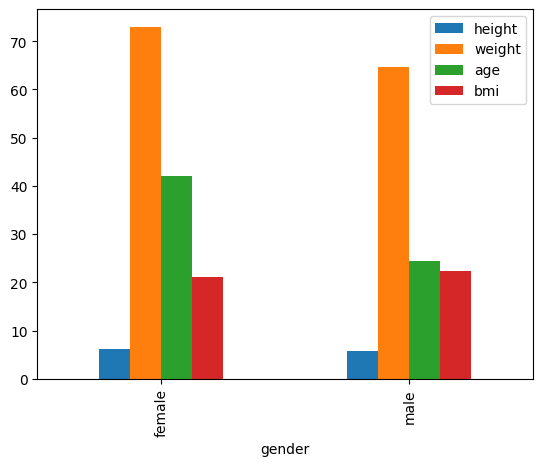

In [65]:
df_person_grp.mean().plot(kind='bar')

## Working with Text Data

In [71]:
df_person.apply(lambda x: x['gender'].upper()[0], axis=1)

person_a    M
person_b    M
person_c    M
person_d    M
person_e    F
dtype: object

In [72]:
df_person.columns

Index(['height', 'weight', 'gender', 'age', 'bmi'], dtype='object')

In [73]:
df_person[['weight','height']].apply(lambda x: x.dtype)

weight    float64
height    float64
dtype: object

In [74]:
df_person.mean(numeric_only=True)

height     5.740000
weight    66.400000
age       28.750000
bmi       22.027082
dtype: float64

In [76]:
df_person['gender'].str.upper().str[0]

person_a    M
person_b    M
person_c    M
person_d    M
person_e    F
Name: gender, dtype: object

## Working with Dates and TimeSeries Data

In [77]:
# settig seed ?
np.random.seed(5)
price = pd.Series(np.random.randint(100,high=150,size=150),
                  index=pd.date_range('2000-1-1', periods=150, freq='B'),name='col1')

In [78]:
price.head()

2000-01-03    135
2000-01-04    114
2000-01-05    147
2000-01-06    138
2000-01-07    116
Freq: B, Name: col1, dtype: int64

In [79]:
import pandas 

<AxesSubplot: >

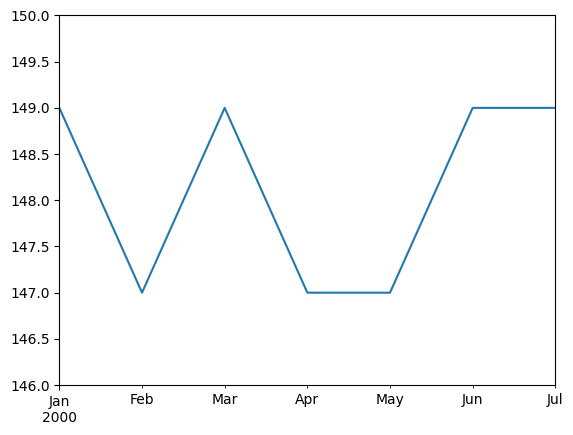

In [80]:
price.groupby(pd.Grouper(freq='1M')).max().plot(ylim=(146,150))

In [81]:
np.random.seed(5)
price1 = pd.Series(np.random.randint(200,high=250,size=500),
                   index=pd.date_range('2000-1-1', periods=500, freq='D'),name='col2')
#all_days = pd.date_range('2000-1-1', periods=500, freq='D')

In [82]:
df_time = pd.DataFrame({'col1':price,'col2':price1})

In [83]:
df_time.head()

,col1,col2
2000-01-01,NaN,235
2000-01-02,NaN,214
2000-01-03,135.0,247
2000-01-04,114.0,238
2000-01-05,147.0,216


In [84]:
len(df_time)

500

In [85]:
df_time.dtypes

col1    float64
col2      int64
dtype: object

<AxesSubplot: >

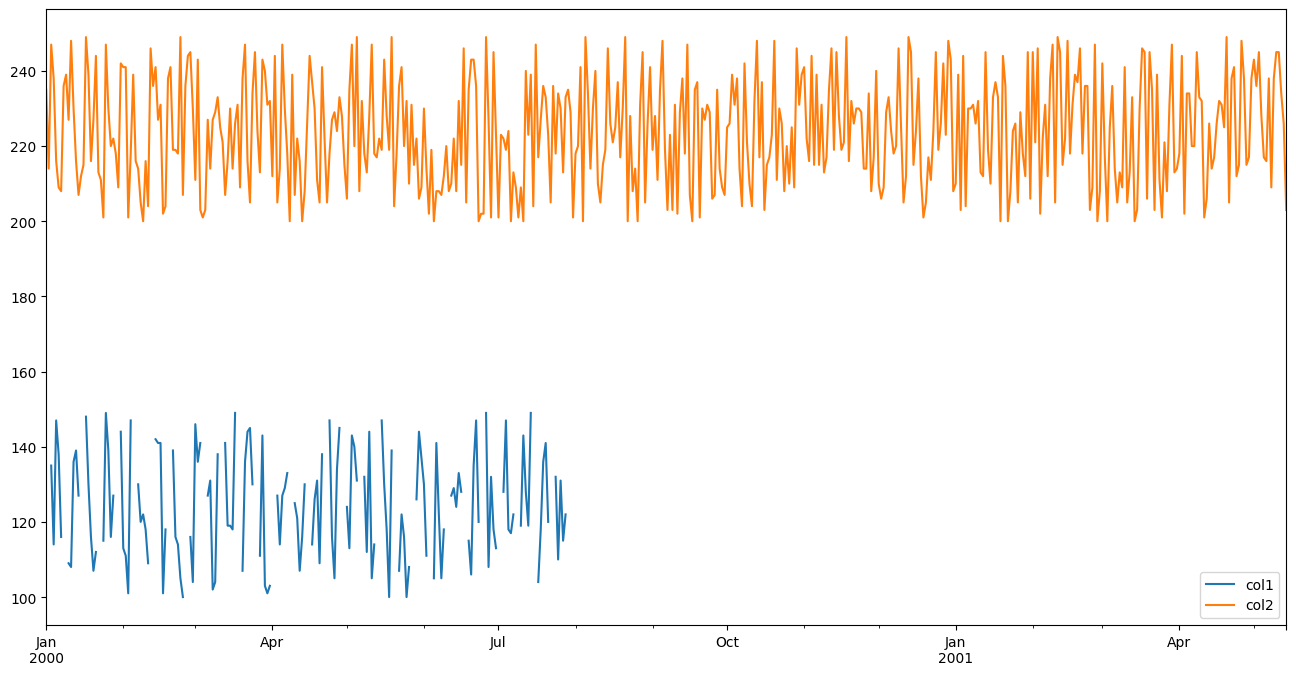

In [86]:
df_time.plot(figsize=(16,8))

<AxesSubplot: >

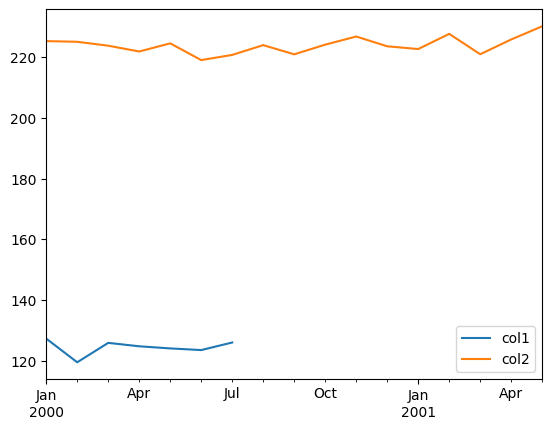

In [87]:
df_time.groupby(pd.Grouper(freq='1M')).mean().plot()

In [88]:
#pd.Categorical?